In [1]:
import torch
from torch import nn # contain building blocks of neural network
from IPython.display import Image, display
import matplotlib.pyplot as plt


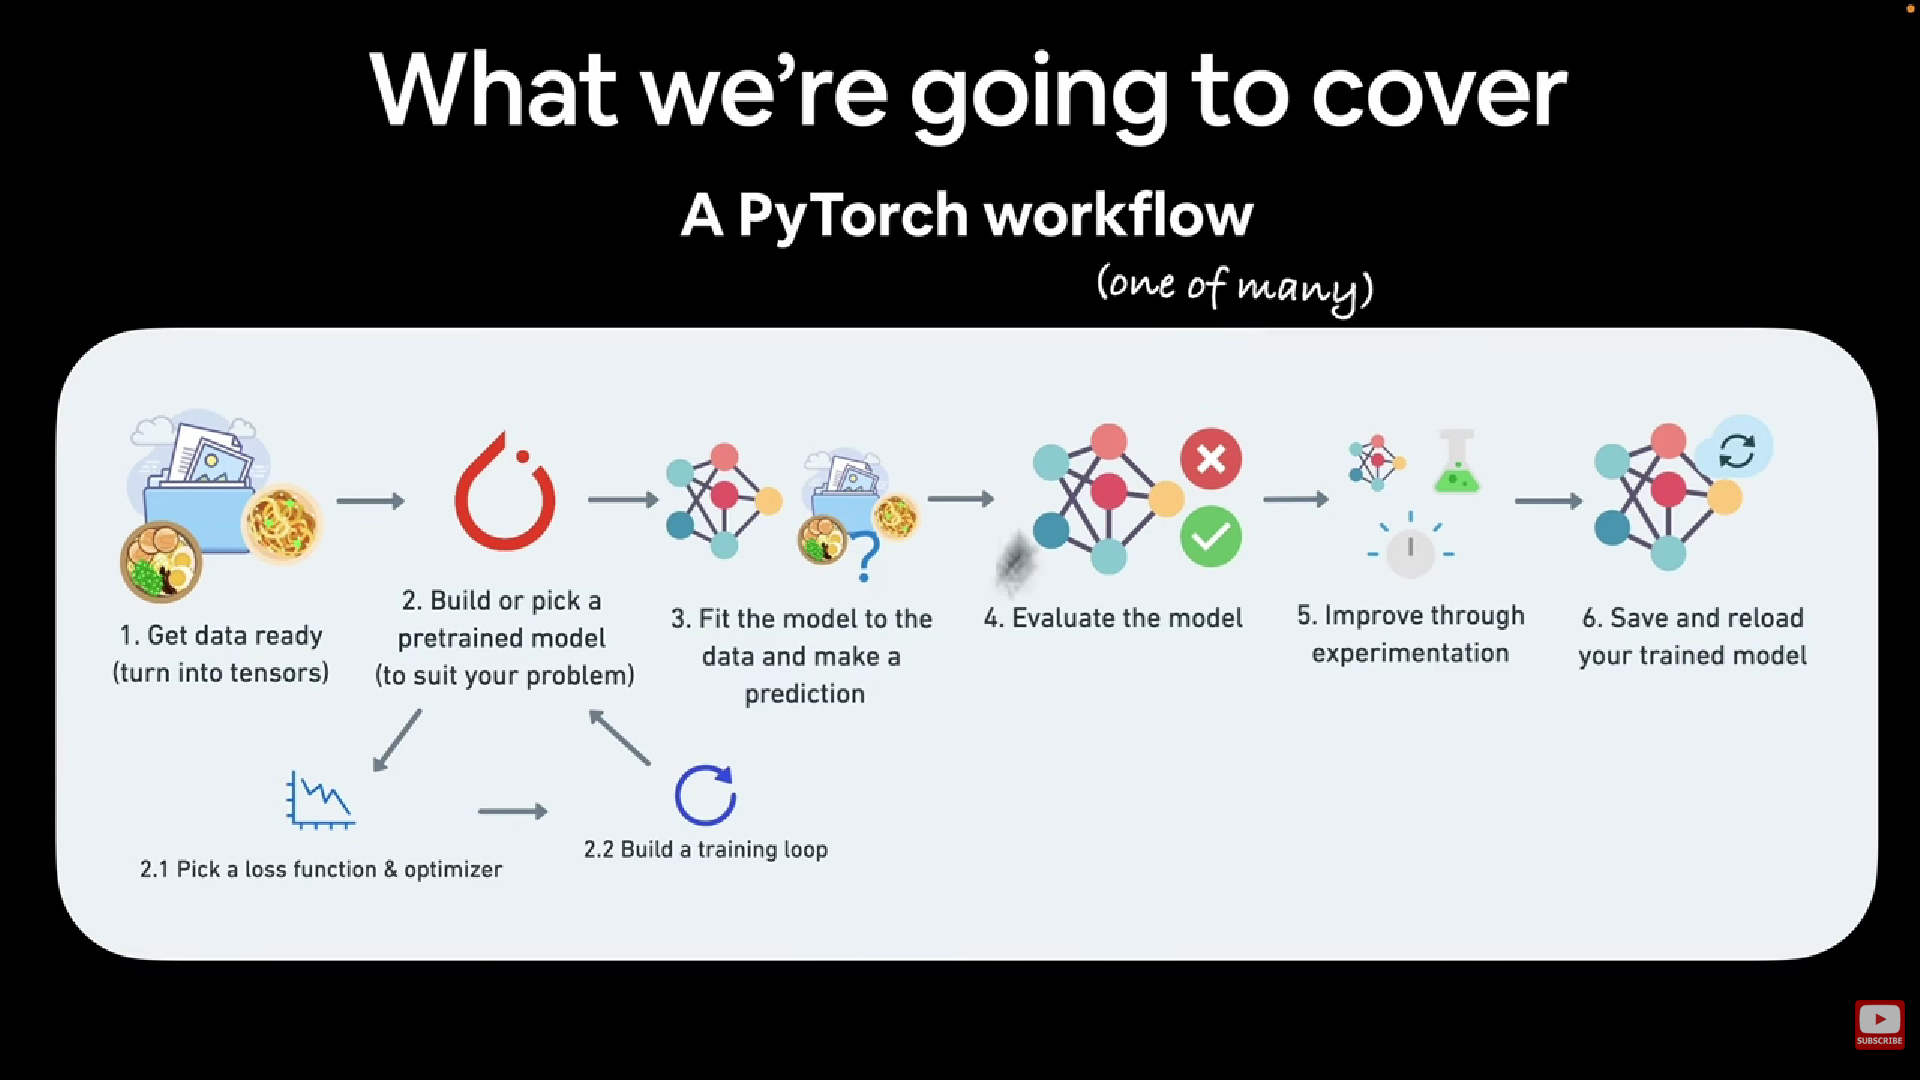

In [2]:
display(Image(filename="./images/image1.png"))

### First we will create a known data with the help of linear regression Formula
##### formula : Y = aX +b Here 'a' is weight and 'b' is bias

In [3]:
# getting the parameter 
weight =0.7
bias = 0.3
#getting the tensor
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = X*weight +bias

In [4]:
X[:5],Y[:5],len(X),len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

In [5]:
# lets see a manual method of spliting we can use scikit learn or use toch to do it also
train_split = int(0.8 * len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]
len(X_train),len(X_test),len(Y_train),len(Y_test)                

(40, 10, 40, 10)

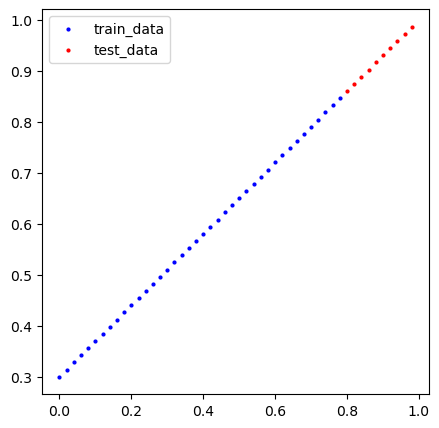

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train,s=4,c='b',label='train_data')
plt.scatter(X_test,Y_test,s=4,c='r',label='test_data')
plt.legend()            

### creation of a model
##### how it works
- first it will take some random value of weight and bias
- then it will update the values after looking at the ideal value or get closer to it

##### how it is done
- by gradient desent
- by backpropogation

In [7]:
class linear_regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype = torch.float))

    def forward(self,x: torch.tensor) -> torch.tensor:
        return self.weight*x +self.bias

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules,if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### checking content of our model
we can do this by just using '.parameter()'

In [8]:
random_seed = 42
torch.manual_seed(random_seed)
torch.randn(1)

tensor([0.3367])

In [9]:
torch.manual_seed(random_seed)
model0 = linear_regression()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction
- first we will give our training data which will be passed in the forward()
- to check it prediction power by accuracy for predicting y_test based on the x_test

In [11]:
Y_pred = model0(X_test)

In [12]:
Y_pred_numpy = Y_pred.detach().numpy()# we have many other options like inference mode or no grad ,inference mode is prefered
Y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

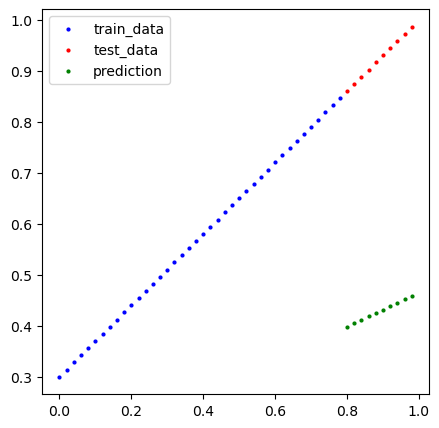

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train,s=4,c='b',label='train_data')
plt.scatter(X_test,Y_test,s=4,c='r',label='test_data')
plt.scatter(X_test,Y_pred_numpy,s=4,c='g',label='prediction')
plt.legend()            

### training of model
##### we can clearly see the model is performing horrible without training
##### we will check our model accoracy with the help of loss 
#### things we need to train our model
- **loss function** : chech accuracy of prediction with respect to actual values
- **optimizer** : take the value from the loss fuction and adjust the values of parameter
- - optimizer takes some hyperparameter as follow --:
  - - 1. **params** : parameter based on which we are going to make prediction
      2. **lr** : it is also called learning rate value of it will tell you how much learn from training set

In [15]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# setting up a loss fuction
loss_function = nn.L1Loss()
# setting up optimizer(std : stocastic gradient descent: good for generalisation
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)

In [18]:
loss_function

L1Loss()

### creation of training loop --:
things we need for the training loop--:
1. loop through the data
2. forward pass to make prediction on the data - also called the forward propagation
3. calculate the loss - compare the predicted value with the target values
4. optimizer zero grad
5. loss backward - move bacward to calculate the gradient for all the parameter with respect to the losses done with the help of **backpropagation**
6. optimizer step - use the optimizer to adjust the values of parameterdone with the help of **gradient descent**

In [19]:
number_of_looping_count = []
loss_values = []
test_loss_value=[]

In [20]:
torch.manual_seed(seed=random_seed)
number_of_looping = 200

for number in range(number_of_looping):
    # starting the training mode
    model0.train()# set all the parameter
    # forward pass 
    y_pred = model0(X_train)
    # calculate the loss
    loss = loss_function(y_pred,Y_train)
    # optimizer zero grad
    optimizer.zero_grad()
    # backpropagation on loss with respect to the parameter of the model
    loss.backward()
    # perform gradient descent
    optimizer.step()
    model0.eval() # turn off diffrent setting not required for testing
    with torch.inference_mode(): # turn off the gradient tracking
        test_preds = model0(X_test)
        test_loss = loss_function(test_preds,Y_test)
    if number % 10 == 0:
        number_of_looping_count.append(number)
        loss_values.append(loss)
        test_loss_value.append(test_loss)
        print(f' number_of_looping : {number} \n loss : {loss} \n test_loss : {test_loss}\n')

 number_of_looping : 0 
 loss : 0.31288138031959534 
 test_loss : 0.48106518387794495

 number_of_looping : 10 
 loss : 0.1976713240146637 
 test_loss : 0.3463551998138428

 number_of_looping : 20 
 loss : 0.08908725529909134 
 test_loss : 0.21729660034179688

 number_of_looping : 30 
 loss : 0.053148526698350906 
 test_loss : 0.14464017748832703

 number_of_looping : 40 
 loss : 0.04543796554207802 
 test_loss : 0.11360953003168106

 number_of_looping : 50 
 loss : 0.04167863354086876 
 test_loss : 0.09919948130846024

 number_of_looping : 60 
 loss : 0.03818932920694351 
 test_loss : 0.08886633068323135

 number_of_looping : 70 
 loss : 0.03476089984178543 
 test_loss : 0.0805937647819519

 number_of_looping : 80 
 loss : 0.03132382780313492 
 test_loss : 0.07232122868299484

 number_of_looping : 90 
 loss : 0.02788739837706089 
 test_loss : 0.06473556160926819

 number_of_looping : 100 
 loss : 0.024458957836031914 
 test_loss : 0.05646304413676262

 number_of_looping : 110 
 loss :

In [21]:
model0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
Y_pred_new = model0(X_test)
Y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], grad_fn=<AddBackward0>)

In [23]:
Y_pred_new_numpy = Y_pred_new.detach().numpy()

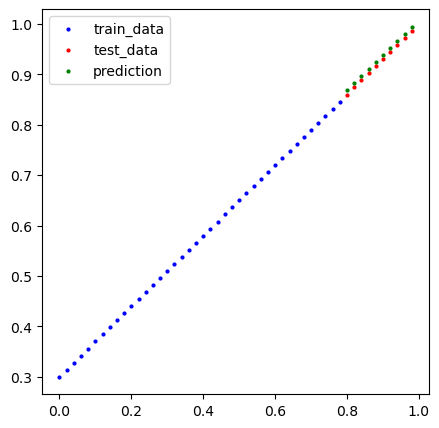

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train,s=4,c='b',label='train_data')
plt.scatter(X_test,Y_test,s=4,c='r',label='test_data')
plt.scatter(X_test,Y_pred_new_numpy,s=4,c='g',label='prediction')
plt.legend()            

In [25]:
loss_values,test_loss_value,number_of_looping_count

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.08

In [26]:
import numpy as np

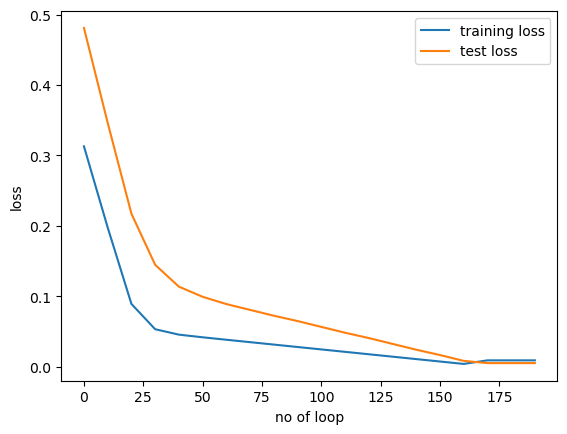

In [27]:
plt.plot(number_of_looping_count,np.array(torch.tensor(loss_values).cpu().numpy()),label ='training loss')
plt.plot(number_of_looping_count,np.array(torch.tensor(test_loss_value).cpu().numpy()),label ='test loss')
plt.xlabel('no of loop')
plt.ylabel('loss')
plt.legend()

### saving our model so we don't have to train it again and again 

In [28]:
torch.save(model0,'./models/linear_model.pth')

In [29]:
torch.save(model0.state_dict(),'./parameter_dictionary/linear_model_params.pth')

### loading our saved model


In [30]:
torch.manual_seed(random_seed)
loaded_model1 = linear_regression()
loaded_model1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [31]:
loaded_model1.load_state_dict(torch.load('./parameter_dictionary/linear_model_params.pth',weight_only = False))
loaded_model1.state_dict()

TypeError: Unpickler.__init__() got an unexpected keyword argument 'weight_only'

In [ ]:
torch.manual_seed(random_seed)
loaded_model2 = torch.load('./models/linear_model.pth',weights_only=False)
loaded_model2.state_dict()

### let make prediction to check our models

In [ ]:
loaded_model1.eval()
with torch.inference_mode():
    loaded_model1_pred = loaded_model1(X_test)
loaded_model1_pred

In [ ]:
loaded_model2.eval()
with torch.inference_mode():
    loaded_model2_pred = loaded_model2(X_test)
loaded_model2_pred

In [ ]:
Y_pred_new_numpy == loaded_model1_pred,Y_pred_new_numpy == loaded_model2_pred

### as we  saw the linearmodel above but pytorch is providing a inbuilt function for linear model which automatically find the weight and bias

In [ ]:
class linear_regression2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self,x: torch.tensor) ->torch.tensor:
        return self.linear_layer(x)

In [ ]:
torch.manual_seed(random_seed)
model1 = linear_regression2()

In [ ]:
model1,model1.state_dict()

In [ ]:
next(model1.parameters()).device

In [ ]:
model1.to('cuda')

In [ ]:
next(model1.parameters()).device

In [ ]:
loss_function= nn.L1Loss()
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.01)

In [ ]:
X_train = X_train.to('cuda')
X_test = X_test.to('cuda')
Y_train= Y_train.to('cuda')
Y_test = Y_test.to('cuda')

In [ ]:
number_of_looping = 200 
for number in range(number_of_looping):
    model1.train()
    y_pred = model1(X_train)
    loss= loss_function(y_pred,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model1.eval()
    with torch.inference_mode():
        test_preds = model1(X_test)
        test_loss = loss_function(test_preds,Y_test)
    if number % 10 == 0:
        print(f"number_of_looping: {number} | Loss: {loss} | Test loss: {test_loss}")

In [ ]:
model1.state_dict()

In [ ]:
Y_pred_new = model1(X_test)

In [ ]:
Y_pred_new_numpy = Y_pred_new.cpu().detach().numpy()

In [ ]:
X_train = X_train.to('cpu')
X_test = X_test.to('cpu')
Y_train= Y_train.to('cpu')
Y_test = Y_test.to('cpu')

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train,s=4,c='b',label='train_data')
plt.scatter(X_test,Y_test,s=4,c='r',label='test_data')
plt.scatter(X_test,Y_pred_new_numpy,s=4,c='g',label='prediction')
plt.legend()            